In [76]:
# Pandas
import pandas as pd

#Preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

# Pipeline
from sklearn.pipeline import Pipeline   # Sequentially apply a list of transformations
from sklearn.compose import ColumnTransformer # Applies in parallel transformations to columns
from sklearn.preprocessing import FunctionTransformer # it makes functions compatible with scikit-learn pipelines

# Grid search 
from sklearn.model_selection import GridSearchCV

# pipeline visualization (only if sklearn version = 0.23.1)
from sklearn import set_config
set_config(display='diagram')

In [77]:
import sklearn
sklearn.__version__

'1.0.2'

# The Titanic dataset

In [78]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/titanic.csv'
titanic = pd.read_csv(url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Numerical features**:
- Age
- Fare
- Pclass (passenger class)
- SibSp (number of siblings / spouses aboard the Titanic)
- Parch (number of parents / children aboard the Titanic)

**Categorical features**:
- Sex
- Ticket
- Cabin
- Embarked (Port of Embarkation: C, Q, and S)

In [79]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [80]:
titanic.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [81]:
titanic.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [82]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [83]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [84]:
titanic.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [85]:
titanic.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## Custom transformers: creating new features

Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing. You can implement a transformer from an arbitrary function with `FunctionTransformer.`

**Title feature:** Let's write a function that extract the title (Mr, Mrs, Miss, Dr, etc) from the name

In [86]:
titanic.Name.head(30)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [87]:
titanic.Name[0].split(",")[1].split('.')[0].strip()

'Mr'

In [88]:
# Title feature
titles = titanic.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
titles

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

<AxesSubplot:>

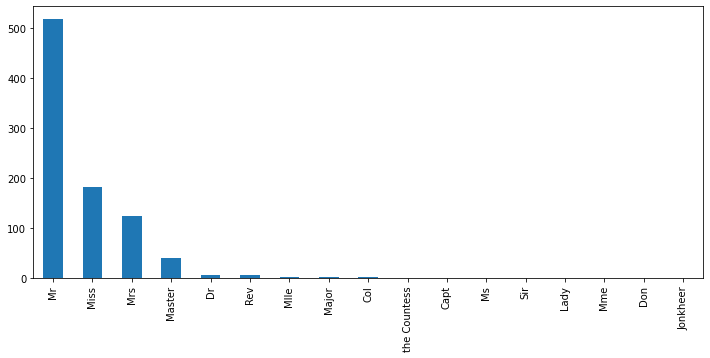

In [89]:
titles.value_counts().plot(kind='bar',figsize=(12,5))

In [92]:
# replace the less common titles with 'Other'
most_common_titles = titles.value_counts().head(6).index.to_list()
titles[~titles.isin(most_common_titles)] = 'Other'

<AxesSubplot:>

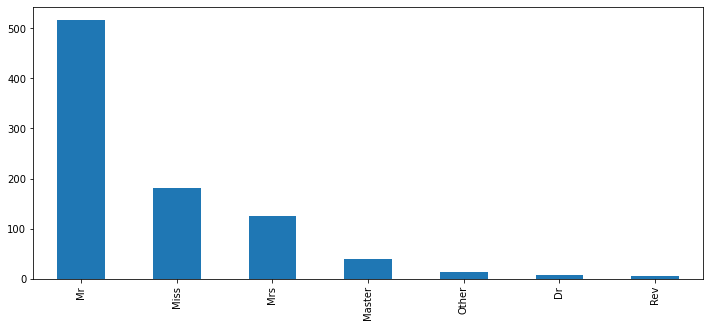

In [93]:
titles.value_counts().plot(kind='bar',figsize=(12,5))

In [94]:
most_common_titles

['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev']

In [95]:
def get_title(dataframe):
    df = dataframe.copy()
    df['Title'] = df.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
    df.loc[~df.Title.isin(most_common_titles),'Title'] = 'Other'
    return df

In [96]:
# check that it works
get_title(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [97]:
# check that it works
get_title(titanic).Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      14
Dr          7
Rev         6
Name: Title, dtype: int64

**Family size feature:** Let's write a function that computes the size of a family.

In [98]:
# family size
family_size = titanic.SibSp+titanic.Parch+1
family_size

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Length: 891, dtype: int64

In [99]:
def get_family_size(dataframe):
    df = dataframe.copy()
    df['Family_size'] = df.SibSp + df.Parch + 1
    return df

In [100]:
# check that it works
get_family_size(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


To build a transformer that applies our two functions `get_title` and `get_family_size` in a a pipeline, use `FunctionTransformer`.

In [101]:
# Functions for the pipeline
family_size_processor = FunctionTransformer(get_family_size)
title_processor = FunctionTransformer(get_title)

In [103]:
family_size_processor.fit_transform(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [104]:
title_processor.fit_transform(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


 ## Column transformers and pipelines

We often need to apply different sets of tranformers to different groups of columns. 
This is where `ColumnTransformer` comes in.
We'll create a transformer for the numerical featues, a transformer for the categorical features and a transformer por the ordinal features.

In [105]:
# numerical features pipeline: impute+scale
numeric_features = ['Age', 'Fare','Family_size', 'Pclass']
numeric_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

In [106]:
# categorical_features pipeline: impute+encode
categorical_features = ['Embarked', 'Sex','Title']
categorical_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())])

In [107]:
feature_processor = ColumnTransformer(
    transformers=[
        ('num', numeric_processor, numeric_features),
        ('cat', categorical_processor, categorical_features)
    ],
         remainder='drop') # drop 'Name', 'SibSp', 'Parch' columns

## knn classifier

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [109]:
pipe = Pipeline(steps=[('get family_size', family_size_processor),
                           ('get title', title_processor),
                           ('preprocessor', feature_processor),
                           ('poly_features', PolynomialFeatures(degree=2)), # add polynomial combinations of the features
                           ('clf',knn_clf)   
                          ])
pipe

Pipeline(steps=[('get family_size',
                 FunctionTransformer(func=<function get_family_size at 0x000001D3483BC0D0>)),
                ('get title',
                 FunctionTransformer(func=<function get_title at 0x000001D3483ADB80>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'Family_size',
                                                   'Pclass']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Embarked', 'Sex',
                                                   'Title'])])),
                ('poly_features', PolynomialFeatures()),
                ('clf', KNeighborsClassifier())])

## Grid search for hyperparameter tuning

In [110]:
# feature matrix/ target vector
feature_cols = ['Name','Age','Fare','Sex','Embarked','Pclass','SibSp','Parch']
X = titanic[feature_cols] 
y = titanic.Survived

In [111]:
# reload the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/titanic.csv'
titanic = pd.read_csv(url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [112]:
# train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [113]:
param_grid = { 
    'clf__n_neighbors': list(range(1,21)),
    'clf__weights' : ['uniform','distance']
}

In [114]:
# instantiate and fit the grid
grid = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('get family_size',
                                        FunctionTransformer(func=<function get_family_size at 0x000001D3483BC0D0>)),
                                       ('get title',
                                        FunctionTransformer(func=<function get_title at 0x000001D3483ADB80>)),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardS...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Embarked',
                                                                          'Sex',
                                                                          'Title'])])),
                                       ('poly_features', PolynomialFeatures()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                         'clf__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [37]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]

,mean_test_score,params
0,0.755925,"{'clf__n_neighbors': 1, 'clf__weights': 'unifo..."
1,0.755925,"{'clf__n_neighbors': 1, 'clf__weights': 'dista..."
2,0.791904,"{'clf__n_neighbors': 2, 'clf__weights': 'unifo..."
3,0.749955,"{'clf__n_neighbors': 2, 'clf__weights': 'dista..."
4,0.800927,"{'clf__n_neighbors': 3, 'clf__weights': 'unifo..."
5,0.773948,"{'clf__n_neighbors': 3, 'clf__weights': 'dista..."
6,0.812913,"{'clf__n_neighbors': 4, 'clf__weights': 'unifo..."
7,0.779941,"{'clf__n_neighbors': 4, 'clf__weights': 'dista..."
8,0.820421,"{'clf__n_neighbors': 5, 'clf__weights': 'unifo..."
9,0.784441,"{'clf__n_neighbors': 5, 'clf__weights': 'dista..."


In [115]:
# best hyper-parameters
grid.best_params_

{'clf__n_neighbors': 10, 'clf__weights': 'uniform'}

In [116]:
# best accuracy
grid.best_score_

0.8293532338308458

In [117]:
# best predictor
best_clf = grid.best_estimator_

# Test the model

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [119]:
y_test_pred = best_clf.predict(X_test)

In [120]:
confusion_matrix(y_test,y_test_pred)

array([[117,  11],
       [ 26,  69]], dtype=int64)

In [66]:
accuracy_score(y_test,y_test_pred)

0.7982062780269058

## A fake passenger

In [121]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [126]:
# Making predictions: Would I have survived the Titanic disaster? 0 = No, 1 = Yes
Javier = pd.DataFrame({
                    'Name':['Perez-Alvaro, Mr. Javier','Perez-Alvaro, Dr. Javier'],
                    'Age': [35, 35],
                    'Fare': [9,500],
                    'Sex': ['male','male'],
                    'Embarked': ['S','C'],
                    'Pclass':[3,1],
                    'SibSp': [0,0],
                    'Parch': [0,0],
                   })
Javier

,Name,Age,Fare,Sex,Embarked,Pclass,SibSp,Parch
0,"Perez-Alvaro, Mr. Javier",35,9,male,S,3,0,0
1,"Perez-Alvaro, Dr. Javier",35,500,male,C,1,0,0


In [127]:
best_clf.predict(Javier)

array([0, 1], dtype=int64)

<AxesSubplot:>

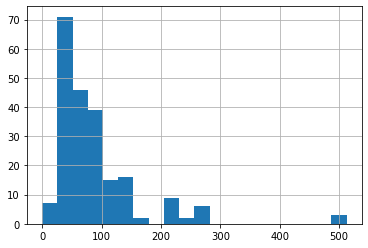

In [128]:
titanic[titanic.Pclass==1].Fare.hist(bins=20)

In [73]:
titanic[titanic.Pclass==1].Embarked.value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

<AxesSubplot:>

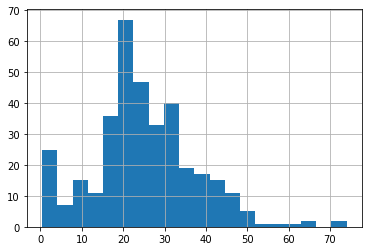

In [74]:
titanic[titanic.Pclass==3].Age.hist(bins=20)